### Importing Libraries
The analysis will be done using the following libraries : Pandas, Numpy,  Matplotlib / Seaborn

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [70]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [71]:
dataset.shape

(1156, 7)

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Data Preprocessing
As we understood that there are a lot of null values in PURPOSE column, so for that we will me filling the null values with a NOT keyword. You can try something else too.

In [73]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.

In [74]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
									errors='coerce')

Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [75]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

Once we are done with creating new columns, we can now drop rows with null values.

In [76]:
dataset.dropna(inplace=True)

It is also important to drop the duplicates rows from the dataset. To do that, refer the code below.

In [77]:
dataset.drop_duplicates(inplace=True)

### Data Visualization

In [78]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

Now, we will be using matplotlib and seaborn library for countplot the CATEGORY and PURPOSE columns.

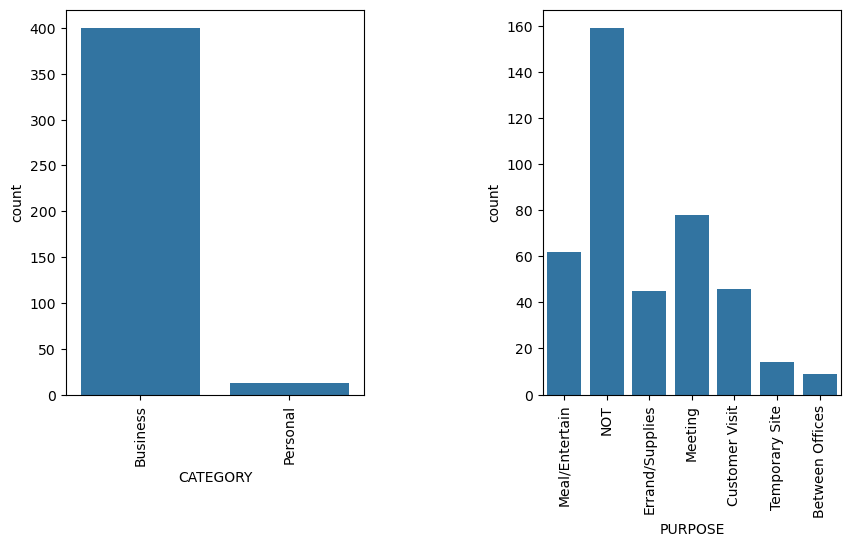

In [79]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x=dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x=dataset['PURPOSE'])
plt.xticks(rotation=90)

plt.subplots_adjust(wspace=0.6)  
plt.show()


Let's do the same for time column, here we will be using the time column which we have extracted above.




(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

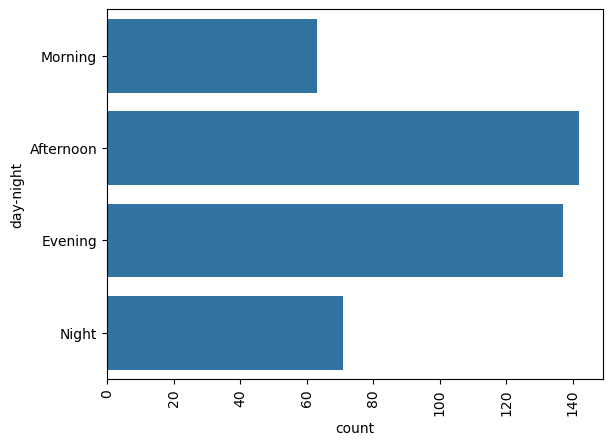

In [80]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

Now, we will be comparing the two different categories along with the PURPOSE of the user.

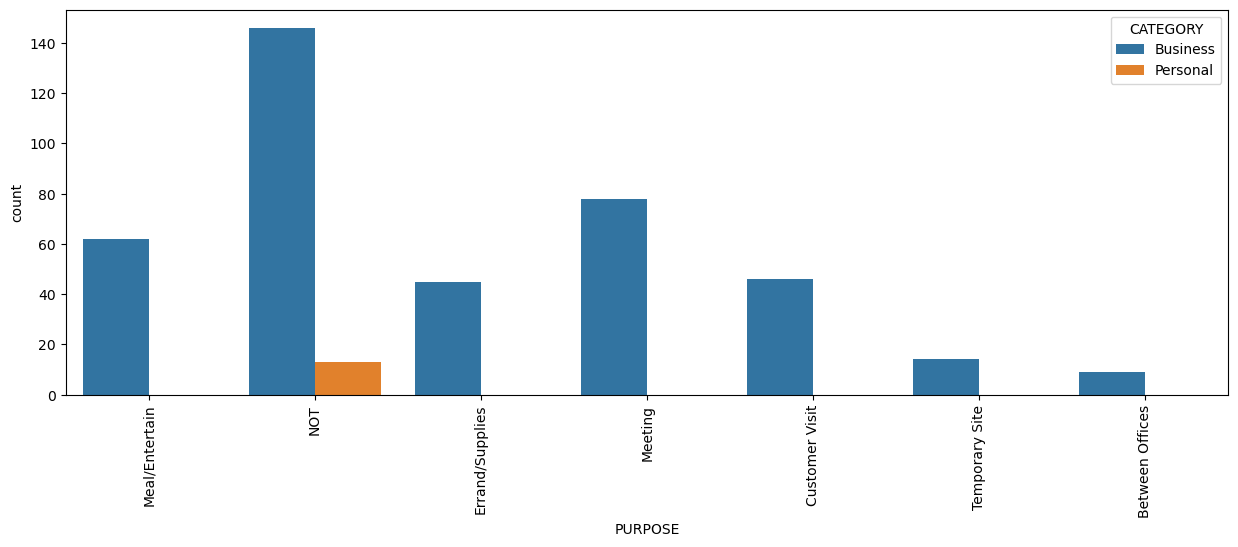

In [81]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

**Insights from the above count-plots :** <br>
Most of the rides are booked for business purpose.<br>
Most of the people book cabs for Meetings and Meal / Entertain purpose.<br>
Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

As we have seen that CATEGORY and PURPOSE columns are two very important columns. So now we will be using OneHotEncoder to categories them.

In [82]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)


After that, we can now find the correlation between the columns using heatmap.

<Axes: >

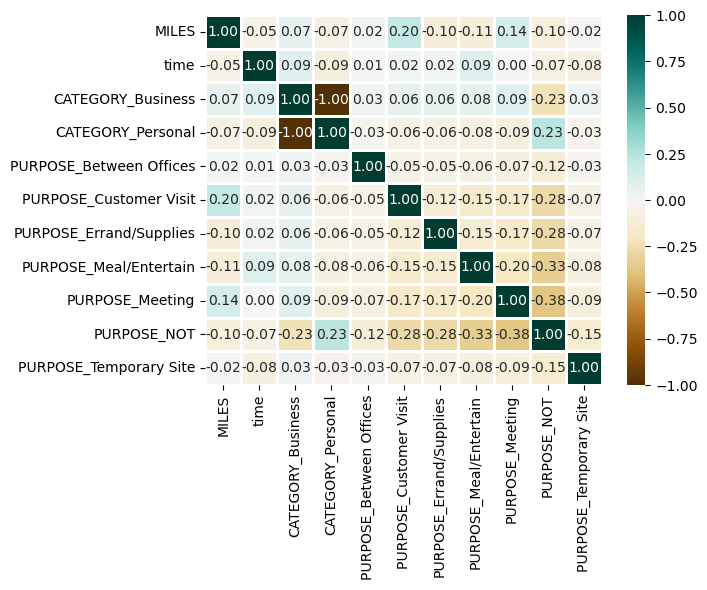

In [83]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

# Now you can create the heatmap
sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

**Insights from the heatmap:**<br>
Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.<br>
There is not much correlation between the features.<br>
Now, as we need to visualize the month data. This can we same as done before (for hours). 

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

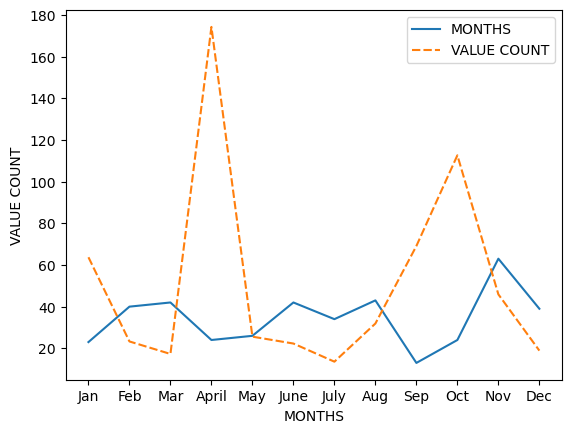

In [84]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": dataset.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

**Insights from the above plot :**<br>
The counts are very irregular.<br>
Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.<br>
Visualization for days data.

In [85]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

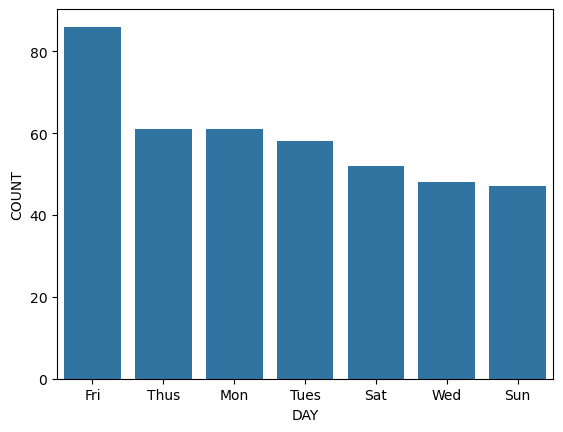

In [86]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

Now, let's explore the MILES Column .

We can use boxplot to check the distribution of the column.

<Axes: ylabel='MILES'>

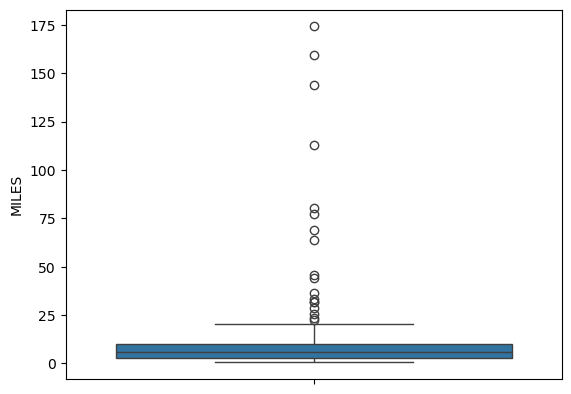

In [87]:
sns.boxplot(dataset['MILES'])

As the graph is not clearly understandable. Let's zoom in it for values lees than 100.

<Axes: ylabel='MILES'>

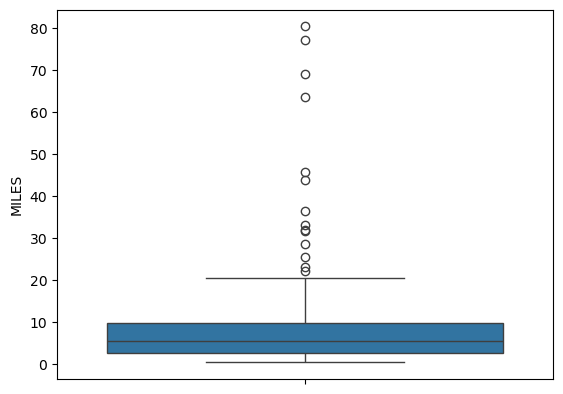

In [88]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

It's bit visible. But to get more clarity we can use distplot for values less than 40.

<Axes: xlabel='MILES', ylabel='Density'>

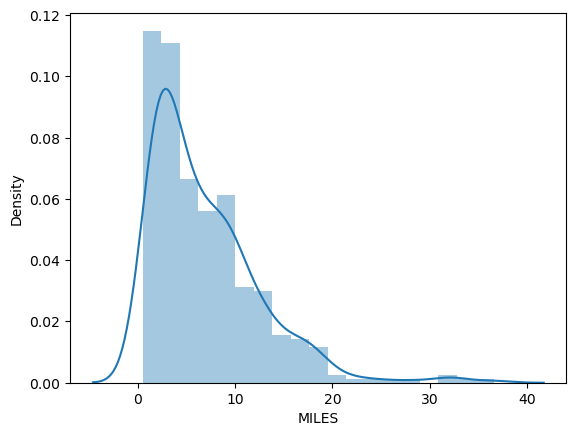

In [89]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

**Insights from the above plots :** <br>
Most of the cabs booked for the distance of 4-5 miles.<br>
Majorly people chooses cabs for the distance of 0-20 miles.<br>
For distance more than 20 miles cab counts is nearly negligible.<br>

### Thanks For Visiting - Vedururu Srinivasa Rao